<a href="https://colab.research.google.com/github/cycerow/I2A2_AI_industry/blob/main/Desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###DESAFIO:
A planilha contém 17 sensores e 8 equipamentos.
Um dos equipamentos está com defeito.
A tarefa de vocês é descobrir qual é o equipamento defeituoso.
Importante, quero o equipamento, e não o sensor que está alarmando o defeito.
19h44
A entrega deve ser através de um e-mail para celso@i2a2.academy.
Vocês devem colocar no assunto: I2A2-ABDI - desafio 1.
No corpo do e-mail, deve constar qual é o equipamento defeituoso e o descritivo de como você chegou a esta conclusão.
19h45
A data de entrega é até o dia 23/01/2023 às 23h59 (horário de Brasília).
19h45
Após este horário, não vou considerar as atividades como entregues.
19h46
A ausência de entrega será considerada uma desistência EXPLÍCITA e IRREVOGÁVEL.
19h46
Ou seja, se não entregar, será imediatamente eliminado do programa.
19h46
Boa sorte!

In [ ]:
#Importação de bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('/content/Defective_Equipment (revised).xlsx')
df = df.iloc[:,0:8]
df

,Seq,V1,V2,V3,V4,V5,V6,V7
0,1,375,135,458,475,509,336,469
1,2,57,47,53,73,63,62,63
2,3,245,267,242,227,271,219,268
3,4,1472,1494,1462,1582,1613,1323,1490
4,5,105,66,103,103,118,98,101
5,6,54,41,62,64,55,59,63
6,7,193,209,184,235,207,172,223
7,8,147,93,122,160,139,130,152
8,9,1102,674,957,1137,1058,990,1098
9,10,720,1033,566,874,628,646,706


In [ ]:
# Calculo da ,matriz de correlação sem limpeza dos dados
corr = df.iloc[:,1:8].corr()
corr

,V1,V2,V3,V4,V5,V6,V7
V1,1.000000,0.947619,0.984917,0.990654,0.985102,0.999954,0.994283
V2,0.947619,1.000000,0.940742,0.937061,0.940745,0.947792,0.948130
V3,0.984917,0.940742,1.000000,0.964122,0.999965,0.985104,0.995020
V4,0.990654,0.937061,0.964122,1.000000,0.964438,0.990426,0.975923
V5,0.985102,0.940745,0.999965,0.964438,1.000000,0.985238,0.995116
V6,0.999954,0.947792,0.985104,0.990426,0.985238,1.000000,0.994309
V7,0.994283,0.948130,0.995020,0.975923,0.995116,0.994309,1.000000


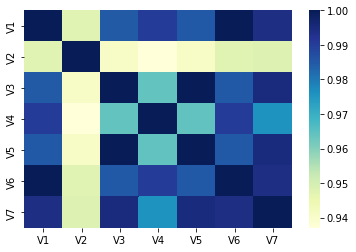

In [ ]:
#mapa de calor das correlações sem limpeza
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, cmap="YlGnBu")

In [ ]:
#limpeza dos dados
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importando o objeto
from pyod.models.knn import KNN

# instanciando o onjeto KNN
detector = KNN()

#treinando um detector de oultliers
detector.fit(df.iloc[:,1:8])


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
previsoes = detector.labels_
previsoes

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([15,  2]))

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 571.40616027,  382.85898187,  276.48146412, 2743.91800169,
        283.65295697,  391.33489494,  190.97120202,  202.15588045,
       1465.05494777, 1123.70992698,  219.815832  ,  967.67918237,
        684.41653984,  199.79739738,  386.59927574, 2726.93490938,
        182.78402556])

In [ ]:
outliers = []
for i in range(len(previsoes)):
    if previsoes[i]  == 1:
      outliers.append(i)

In [ ]:
print(outliers)

[3, 15]


In [ ]:
list_outliers = df.iloc[outliers,:]
list_outliers

,Seq,V1,V2,V3,V4,V5,V6,V7
3,4,1472,1494,1462,1582,1613,1323,1490
15,16,1374,1506,1572,1256,1734,1235,1597


In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.9/201.9 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 43.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=51517f6e631181eda681b07c26a2e962422ada9391c48cbed3082e9242c0b93c
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor_analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
kmo_variaveis, kmo = calculate_kmo(df)

In [ ]:
kmo_variaveis

array([0.09774876, 0.71665638, 0.94713651, 0.76371572, 0.74659336,
       0.80626313, 0.73274203, 0.78227538, 0.76902654])

In [ ]:
# Adequação global da analise fatorial, teste de esfericidade de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
qui_quadrado, pvalor = calculate_bartlett_sphericity(df)

In [ ]:
print(qui_quadrado)
print(pvalor)

513.9336937611328
7.033269542502237e-86


In [ ]:
pvalor < 0.05

True

In [ ]:
# Análise de Componenets Principais
# Decomposição a matriz de variancias e covariancias em componentes principais.


X = np.matrix(df.iloc[:,1:8])
S = np.cov(np.transpose(X))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

In [ ]:
pca.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


PCA(n_components=7)

In [ ]:
# Pesos das componentes principais
pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_)

array([1., 0., 0., 0., 0., 0., 0.])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.97768466, 0.99067838, 0.99869123, 0.99975247, 0.9999896 ,
       0.99999802, 1.        ])

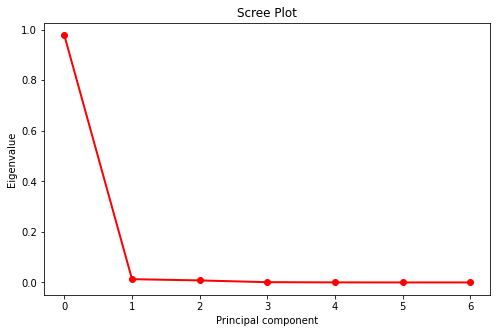

In [ ]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-' , linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')

plt.show()

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pca.components_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[ 0.36829093,  0.37706834,  0.3806974 ,  0.37279593,  0.41961812,
         0.33018558,  0.39137201],
       [-0.11360524,  0.91788561, -0.21739273, -0.07013244, -0.24041821,
        -0.1009136 , -0.15626011]])

In [ ]:
np.round(pca.components_[0],4)

array([0.3683, 0.3771, 0.3807, 0.3728, 0.4196, 0.3302, 0.3914])

In [ ]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
df['PCA1'] = PCA1
df['PCA2'] = PCA2
df.head()

,Seq,V1,V2,V3,V4,V5,V6,V7,V8,PCA1,PCA2
0,1,375,135,458,475,509,336,469,492,-196.141497,-244.701574
1,2,57,47,53,73,63,62,63,58,-1087.004008,25.206710
2,3,245,267,242,227,271,219,268,286,-586.096927,56.012391
3,4,1472,1494,1462,1582,1613,1323,1490,1493,2703.957217,57.616109
4,5,105,66,103,103,118,98,101,118,-982.105182,1.426100
